### 학습목표
- 동물객체를 탐지하는 인공지능 모델을 만들어보자(Object Detection)
- 객체탐지 기술에 필요한 기본개념을 익혀보자
- GPU 자원을 활용해보자

### 객체 탐지 이해
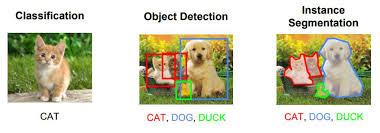

### 1. 데이터 준비
- https://www.kaggle.com/datasets/alessiocorrado99/animals10
- 객체탐지를 위해서는 정답에 2가지 정보가 필요하다
(분류정보와 위치정보)
- 정답데이터를 만드는 작업을 수행(라벨링) with roboflow

#### 데이터셋 가이드 확인
- https://docs.ultralytics.com/datasets/detect/#ultralytics-yolo-format
- 컴퓨터비전에서 원점은 좌측상단이다
- yolo 모델은 박스의 좌표를 (중심x,중심y,너비,높이)형태로 저장
- 이미지모델은 리사이징 전처리를 수행하기 때문에 좌표를 비율로 변환해서 저장한다 -> 유연하게 대처가능

In [ ]:
# 현재 작업 디렉토리 확인
!pwd

/content


In [ ]:
!ls

sample_data


#### 작업 디렉토리 이동

In [ ]:
%cd "./drive/MyDrive/Colab Notebooks"

/content/drive/MyDrive/Colab Notebooks


#### 압축 풀 파일 확인

In [ ]:
!ls

'AI trip.ipynb'  'dog- squirrel.v1i.yolov11.zip'  'EX05 동물 객체 탐지.ipynb'
 dog_squirrel	 'EX04 음식사진 분류.ipynb'


#### 압축풀기

In [ ]:
!unzip "./dog- squirrel.v1i.yolov11.zip" -d "./dog_squirrel"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./dog_squirrel/dog- squirrel.v1i.yolov11/train/images/OIP-0ERf2k91vjSIq_POpXYImwHaFj_jpeg.rf.950f66a50ee9e6745640d7f8d6162bad.jpg  
  inflating: ./dog_squirrel/dog- squirrel.v1i.yolov11/train/images/OIP-0ERf2k91vjSIq_POpXYImwHaFj_jpeg.rf.96d3d088fbb77716ecf731ba26429f54.jpg  
  inflating: ./dog_squirrel/dog- squirrel.v1i.yolov11/train/images/OIP-0ERf2k91vjSIq_POpXYImwHaFj_jpeg.rf.f0a320b1310d46b601b688bca57cace5.jpg  
  inflating: ./dog_squirrel/dog- squirrel.v1i.yolov11/train/images/OIP-0F1ige9tCepKUCMYKKmxlwAAAA_jpeg.rf.224f0fe72507adb98cd7e0b91d8df1d0.jpg  
  inflating: ./dog_squirrel/dog- squirrel.v1i.yolov11/train/images/OIP-0F1ige9tCepKUCMYKKmxlwAAAA_jpeg.rf.7e42dff3f8cb045bb2b677d8797083c0.jpg  
  inflating: ./dog_squirrel/dog- squirrel.v1i.yolov11/train/images/OIP-0F1ige9tCepKUCMYKKmxlwAAAA_jpeg.rf.7ff9e979f15983976a7865b9d885f459.jpg  
  inflating: ./dog_squirrel/dog- squirrel.v1i.yolov11/train/images/OIP-0FHHBZQRsahkBa3TGgOA1QH

#### data.yaml 파일 설정
- train/val/test의 images 폴더 경로 수정
- 클래스 숫자 및 이름 리스트 맞는지 확인

### 2. 모델 학습
- 학습 파라미터 : https://docs.ultralytics.com/usage/cfg/#modes
- GPU 자원을 활용해서 학습 : T4 vs A100

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Unin

#### T4 사용

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="/content/drive/MyDrive/Colab Notebooks/dog_squirrel/dog- squirrel.v1i.yolov11/data.yaml",
                      epochs=1, imgsz=640,
                      batch=64, # GPU 메모리에 한 번에 적재되는 데이터 크기
                      patience=5 # 조기 학습중단을 위한 대기 횟수
                      )

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 94.4MB/s]


Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/Colab Notebooks/dog_squirrel/dog- squirrel.v1i.yolov11/data.yaml, epochs=1, time=None, patience=5, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

100%|██████████| 755k/755k [00:00<00:00, 25.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Colab Notebooks/dog_squirrel/dog- squirrel.v1i.yolov11/train/labels... 2370 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2370/2370 [16:00<00:00,  2.47it/s]


train: New cache created: /content/drive/MyDrive/Colab Notebooks/dog_squirrel/dog- squirrel.v1i.yolov11/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.9±1.3 ms, read: 0.2±0.1 MB/s, size: 53.0 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/dog_squirrel/dog- squirrel.v1i.yolov11/valid/labels... 228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 228/228 [01:35<00:00,  2.38it/s]

val: New cache created: /content/drive/MyDrive/Colab Notebooks/dog_squirrel/dog- squirrel.v1i.yolov11/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1       8.8G      1.138      2.657      1.635          3        640: 100%|██████████| 38/38 [00:55<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.76s/it]


                   all        228        268    0.00365      0.904      0.197     0.0774

1 epochs completed in 0.020 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]


                   all        228        268    0.00365      0.904      0.199     0.0777
                   dog        120        152    0.00456      0.921      0.212     0.0862
              squirrel        108        116    0.00273      0.888      0.186     0.0693
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to runs/detect/train


#### A100 사용

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="/content/drive/MyDrive/Colab Notebooks/dog_squirrel/dog- squirrel.v1i.yolov11/data.yaml",
                      epochs=100, imgsz=640,
                      batch=64, # GPU 메모리에 한 번에 적재되는 데이터 크기
                      patience=5 # 조기 학습중단을 위한 대기 횟수
                      )

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/Colab Notebooks/dog_squirrel/dog- squirrel.v1i.yolov11/data.yaml, epochs=100, time=None, patience=5, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, 

100%|██████████| 755k/755k [00:00<00:00, 13.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Colab Notebooks/dog_squirrel/dog- squirrel.v1i.yolov11/train/labels.cache... 2370 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2370/2370 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.2±0.2 MB/s, size: 53.0 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/dog_squirrel/dog- squirrel.v1i.yolov11/valid/labels.cache... 228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 228/228 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.57G      1.162      2.647      1.664          6        640: 100%|██████████| 38/38 [00:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.12s/it]

                   all        228        268    0.00472      0.919      0.328      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.1G       1.26      1.929      1.703         14        640: 100%|██████████| 38/38 [00:08<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all        228        268      0.434      0.175      0.212     0.0699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.1G      1.356      1.837      1.764          2        640: 100%|██████████| 38/38 [00:08<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all        228        268      0.639      0.184     0.0892      0.023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.1G      1.415       1.76      1.812         10        640: 100%|██████████| 38/38 [00:08<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all        228        268      0.223      0.415      0.155     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.1G      1.368      1.604      1.755          6        640: 100%|██████████| 38/38 [00:08<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all        228        268       0.37      0.515      0.355      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.1G      1.309      1.443      1.703          8        640: 100%|██████████| 38/38 [00:08<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all        228        268     0.0556      0.227     0.0305    0.00945
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



6 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]


                   all        228        268    0.00474      0.923      0.332      0.137
                   dog        120        152    0.00729      0.914      0.434       0.19
              squirrel        108        116    0.00219      0.931       0.23     0.0836
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train2
